In [1]:
# drawing utils
%matplotlib notebook
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker, colors
from matplotlib import animation
# from matplotlib.colors import hsv_to_rgb
# matplotlib.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Helvetica"],
})

from cycler import cycler

import os


# math utils
import numpy as np

# statistics utils
import pandas as pd

In [2]:
# List files to be processed

def FileNameParse(folder_path):
    filepath = []
    for maindir, subdie, file_name_list in os.walk(folder_path):
        for file_name in file_name_list:
            filepath.append(os.path.join(maindir, file_name))
            
    DelayList = []
    start_index = 0
    end_index = 0
    FileDict = {}
    for i in range(len(filepath)):
        for j in range(len(filepath[i])):
            if filepath[i][j] == '_':
                start_index = j
            elif filepath[i][j] == 'p':
                end_index = j
            Delay = filepath[i][start_index+1:end_index+2]  
        FileDict.setdefault(Delay,[]).append(filepath[i])
    
    return FileDict


In [3]:
# Normalization 2D Data

def norm_pp_data(twoD_data):
    Data_max=np.amax(np.absolute(twoD_data))
#    norm_data=np.zeros((len(twoD_data),len(twoD_data[0])))
    norm_data = [ [0]*len(twoD_data[0]) for i in range(len(twoD_data))]
    print(len(norm_data),len(norm_data[0]))
    print(len(twoD_data),len(twoD_data[0]))
    for i in range(len(twoD_data)):
        for j in range(len(twoD_data[i])):
            norm_data[i][j] = twoD_data[i][j]/Data_max
    return norm_data
# Parse data

def parse_pp_data(file_path_list):
    rdata = np.loadtxt(file_path_list[1])
    data = np.zeros([len(rdata)-1,len(rdata[0])-1])
    
    for file_path in file_path_list:
        rdata = np.loadtxt(file_path)
        data = rdata [1:,1:]+data
    Data = data/len(file_path_list)
#    print("Processing", file_path_list)
    probe_wavelength = rdata[0,1:]
    pump_wavelength = Delay = rdata[1:,0]
    Data_max=np.amax(np.absolute(Data))
    data = [ [0]*len(Data[0]) for i in range(len(Data))]
    for i in range(len(Data)):
        for j in range(len(Data[i])):
            Data[i][j] = Data[i][j]/Data_max
    # max and min values from data
    Dmax = Data.max()
    Dmin = Data.min()
    return probe_wavelength, pump_wavelength, Delay, Data, Dmax, Dmin

<IPython.core.display.Javascript object>


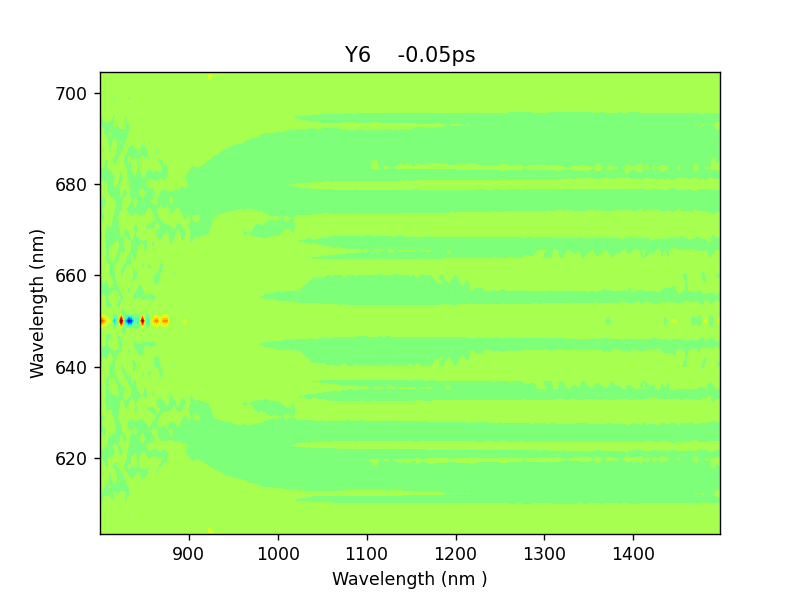

Processing ['C:\\Group\\NIR\\opv\\2D\\Y6\\20211228-622pump-5uw\\211228_125931_-0.05ps.2dv', 'C:\\Group\\NIR\\opv\\2D\\Y6\\20211228-622pump-5uw\\211228_130100_-0.05ps.2dv', 'C:\\Group\\NIR\\opv\\2D\\Y6\\20211228-622pump-5uw\\211228_130228_-0.05ps.2dv', 'C:\\Group\\NIR\\opv\\2D\\Y6\\20211228-622pump-5uw\\211228_130357_-0.05ps.2dv', 'C:\\Group\\NIR\\opv\\2D\\Y6\\20211228-622pump-5uw\\211228_130526_-0.05ps.2dv', 'C:\\Group\\NIR\\opv\\2D\\Y6\\20211228-622pump-5uw\\211228_130655_-0.05ps.2dv', 'C:\\Group\\NIR\\opv\\2D\\Y6\\20211228-622pump-5uw\\211228_130824_-0.05ps.2dv', 'C:\\Group\\NIR\\opv\\2D\\Y6\\20211228-622pump-5uw\\211228_130953_-0.05ps.2dv', 'C:\\Group\\NIR\\opv\\2D\\Y6\\20211228-622pump-5uw\\211228_131122_-0.05ps.2dv', 'C:\\Group\\NIR\\opv\\2D\\Y6\\20211228-622pump-5uw\\211228_131251_-0.05ps.2dv', 'C:\\Group\\NIR\\opv\\2D\\Y6\\20211228-622pump-5uw\\211228_131420_-0.05ps.2dv', 'C:\\Group\\NIR\\opv\\2D\\Y6\\20211228-622pump-5uw\\211228_131548_-0.05ps.2dv', 'C:\\Group\\NIR\\opv\\2D\\Y6

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [4]:
# set plot details

    


def plot_pp_2d(filepath_list, sample_name, figfolder_path, delay):
    fig,ax=plt.subplots()
    figtitle = sample_name +'    '+ delay 
    probe_wavlength, pump_wavelength,delay, data, dmax, dmin = parse_pp_data(filepath_list)
    ax.set(xlabel='Wavelength (nm )', ylabel='Wavelength (nm)', title= figtitle)
    levels = np.arange(-1, 1, 0.1)
    im = ax.contourf(probe_wavlength, pump_wavelength, data, levels=levels, cmap='jet')
#    fig.colorbar(images[0], ax=ax, orientation='vertical', label='$\mathit\Delta$ O.D.')
    plt.show()
    if not os.path.exists('./'+figfolder_path):
        os.makedirs('./'+figfolder_path)
    figpath = './'+figfolder_path+'/'+sample_name+'_'+delay+'.png'
    fig.savefig(figpath)

folder_path=r'C:\Group\NIR\opv\2D\Y6\20211228-622pump-5uw'
file_dict=FileNameParse(folder_path)
#print(file_dict)
delay_list=list(file_dict.keys())
for delay in delay_list:
    plot_pp_2d(file_dict[delay],'Y6','Y6-20211228-622pump-5uw',delay)


#fig.savefig('test.png')

